In this excersie we will try to predict weather a person had extramarital affairs given certain parameters like age,satisfaction in marrage,number of childern,occupation and more.

We will be implimenting a Logistic regression model to do this .
The data is taken form the statsmodel package available in python

In [73]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt
import math

import seaborn as sns
sns.set_style('whitegrid')

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#import the data
import statsmodels.api as sm

In [74]:
df=sm.datasets.fair.load_pandas().data

In [75]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [76]:
## we need to first check who all had an affair

def affair_check(x):
    if x!=0:
        return 1
    else:
        return 0
    
    
    

In [77]:
df['had_affair']=df['affairs'].apply(affair_check)

In [78]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [79]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Lets first visualise our data to see what variables effect the outcome more. I will plot a catplot for different 
columns that may effect the outcome 

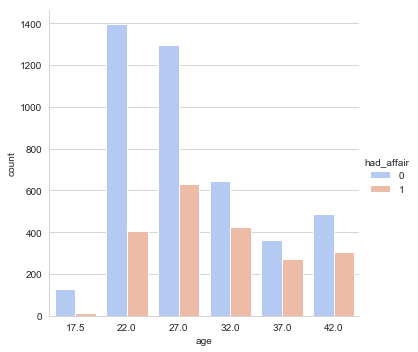

In [80]:


sns.catplot(x='age',kind="count",data=df,hue='had_affair',palette='coolwarm')

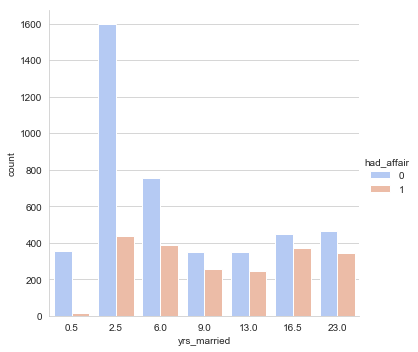

In [81]:
sns.catplot(x='yrs_married',kind="count",data=df,hue='had_affair',palette='coolwarm')

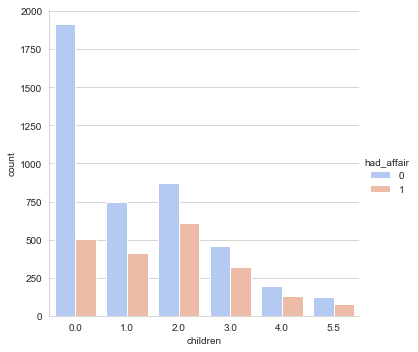

In [82]:
sns.catplot(x='children',kind="count",data=df,hue='had_affair',palette='coolwarm')

In [83]:
## data preparation ###
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [84]:
## see occupation and occ_husb are cateragorical variables ie they are distict ed: 2.5 has no meaning for occupation column
## we make dumy variables


In [85]:
occ_dummies=pd.get_dummies(df['occupation'])
hus_occ_dummies=pd.get_dummies(df['occupation_husb'])

In [86]:
occ_dummies.head()   ### dummied created 6 columns (6 different occupations ) and puts a 1 in the selected row

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [87]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [88]:
X=df.drop(['occupation','occupation_husb','had_affair'],axis=1)

In [89]:
dummies=pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [90]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [91]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [92]:
X=pd.concat([X,dummies],axis=1)
X

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0.000000,0,0,0,1,0,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0.000000,0,0,0,0,1,0,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0.000000,0,0,1,0,0,0,1,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0.000000,0,0,1,0,0,0,0,0,0,1,0,0


In [93]:
Y=df.had_affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

MULTI-CO-LINEARITY:
in occ and hocc dummy variable and when we have dummy variables in general, the values are extreamley corelated to each othe
ie in occ if we know one column ha a 1 we are shure that the rest are zero. this gives us a false accurate reading in our regression.
in order to prevent this we drop 1 column so we sacrifice one column to lower the obvious corelation amng them...

In [94]:
X=X.drop('occ1',axis=1)



In [95]:
X=X.drop('hocc1',axis=1)


In [96]:
X=X.drop('affairs',axis=1)

In [97]:
Y.head()  ## we need a 1d array

0    1
1    1
2    1
3    1
4    1
Name: had_affair, dtype: int64

In [98]:
Y=np.ravel(Y) ## flattens the array
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [101]:
log_model=LogisticRegression()
log_model.fit(X,Y)

log_model.score(X,Y)

0.7258875274897895

In [102]:
Y.mean()   ## 32% wemen are having affair acc to the array and model has a 75%

0.3224945020420987

NULL ERROR RATE : suppose the model just guessed not maried in all cases ,even then we will get an accuracy rate of 1-322=68% accuracy

so even though the model shows an accuracy of 73% it is not that good when compared to the null error rae

In [106]:
coeff_df=DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df  ### shows the coeffecirents and which values strongly effect the outcome

,0,1
0,rate_marriage,[-0.6978854180026768]
1,age,[-0.056347032908152]
2,yrs_married,[0.10390556524027485]
3,children,[0.018172782105056292]
4,religious,[-0.3684960487396638]
5,educ,[0.008789834665963826]
6,occ2,[0.2979785839591037]
7,occ3,[0.6079160723958301]
8,occ4,[0.34603776729459984]
9,occ5,[0.9423651396317297]


In [107]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [108]:
log_model2=LogisticRegression()
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
class_predict=log_model2.predict(X_test)

In [113]:
print (metrics.accuracy_score(Y_test,class_predict))  # this gives the accuracy when the X test values are compared with 
                                                      # the Y_test values . we see that the accuracy is almost the same as the prev 
                                                      # This means the accuracy prediced in the previous one is reliable even when 
                                                      # compared to the null value error

0.7292713567839196
